In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [48]:
# Extract & Transform
df = pd.read_csv('data/produkt_zehn_min_sd_20200101_20201231_05705.txt', delimiter = ";")

# Remove unneccesary columns
df.drop(['STATIONS_ID', '  QN', 'DS_10', 'SD_10', 'LS_10', 'eor'], axis = 1, inplace = True)

# / 1000 to convert from J/cm² to kJ/cm² then * 2.78 to convert to kWh/m², then * 50m^2 and * 6000 to convert to W/10 Min/m²) 
df['Watt_10min'] =  df['GS_10'] / 1000 * 2.78 * 50 * 6000 * 0.2

df['Watt_1h_ahead'] = df['Watt_10min'].rolling(6).sum().shift(-6).fillna(0)

df['Watt_4h_ahead'] = df['Watt_10min'].rolling(24).sum().shift(-24).fillna(0)

df['Watt_12h_ahead'] = df['Watt_10min'].rolling(72).sum().shift(-72).fillna(0)

df['Watt_24h_ahead'] = df['Watt_10min'].rolling(144).sum().shift(-144).fillna(0)

df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M')

#df.set_index('MESS_DATUM', inplace=True)

#cols = ['Watt_10min', 'Watt_1h_ahead','Watt_4h_ahead', 'Watt_12h_ahead', 'Watt_24h_ahead']
#df[cols] = df[cols].apply(lambda x: pd.Series.round(x, 1))
#df['data_string'] = df.apply(lambda x :';'.join(x.astype(str)),1)

df.head(60)


,MESS_DATUM,GS_10,Watt_10min,Watt_1h_ahead,Watt_4h_ahead,Watt_12h_ahead,Watt_24h_ahead
0,2020-01-01 00:00:00,0.0,0.00,0.00,0.00,23151.84,37896.96
1,2020-01-01 00:10:00,0.0,0.00,0.00,0.00,24536.28,37896.96
2,2020-01-01 00:20:00,0.0,0.00,0.00,0.00,25687.20,37896.96
3,2020-01-01 00:30:00,0.0,0.00,0.00,0.00,26954.88,37896.96
4,2020-01-01 00:40:00,0.0,0.00,0.00,0.00,28172.52,37896.96
5,2020-01-01 00:50:00,0.0,0.00,0.00,0.00,29456.88,37896.96
6,2020-01-01 01:00:00,0.0,0.00,0.00,0.00,30607.80,37896.96
7,2020-01-01 01:10:00,0.0,0.00,0.00,0.00,31608.60,37896.96
8,2020-01-01 01:20:00,0.0,0.00,0.00,0.00,32576.04,37896.96
9,2020-01-01 01:30:00,0.0,0.00,0.00,0.00,33393.36,37896.96


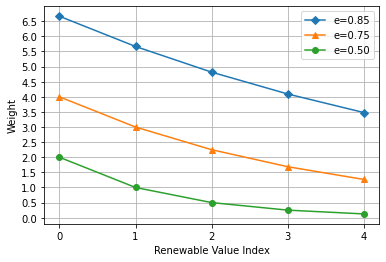

[2.0, 1.0, 0.5, 0.25, 0.125]
[4.0, 3.0, 2.25, 1.6875, 1.265625]
[6.666666666666666, 5.666666666666666, 4.8166666666666655, 4.094166666666665, 3.4800416666666654]


In [34]:
# Wertebereich für x-Achse festlegen:
x = [0, 1.0, 2.0, 3.0, 4.0]

x2 = [(0.5**num)/(1-0.5) for num in x]
x3 = [(0.75**num)/(1-0.75) for num in x]
x4 = [(0.85**num)/(1-0.85) for num in x]
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(x), max(x)+4, 0.5))

# Einzelne Diagramm-Linien plotten:
plt.plot(x, x4, 'D-', label="e=0.85")
plt.plot(x, x3,'^-', label="e=0.75")
plt.plot(x, x2,'o-', label="e=0.50")
plt.legend(loc="upper right")

# Diagramm-Gitter einblenden:
plt.grid(True)
plt.xlabel("Renewable Value Index")
plt.ylabel("Weight")
# Diagramm ausgeben:
plt.show()

print([(0.5**num)/(1-0.5) for num in x])
print([(0.75**num)/(1-0.75) for num in x])
print([(0.85**num)/(1-0.85) for num in x])

In [49]:
# Filter
start_date = '2020-06-01 00:00:00'
end_date = '2020-06-02 00:00:00'

mask = (df['MESS_DATUM'] >= start_date) & (df['MESS_DATUM'] < end_date)

selected_dates = df.loc[mask]

#selected_dates.set_index('MESS_DATUM')

selected_dates.head()




,MESS_DATUM,GS_10,Watt_10min,Watt_1h_ahead,Watt_4h_ahead,Watt_12h_ahead,Watt_24h_ahead
21888,2020-06-01 00:00:00,0.0,0.0,0.0,767.28,285878.52,499882.92
21889,2020-06-01 00:10:00,0.0,0.0,0.0,1401.12,295019.16,499882.92
21890,2020-06-01 00:20:00,0.0,0.0,0.0,2251.80,304093.08,499882.92
21891,2020-06-01 00:30:00,0.0,0.0,0.0,3319.32,313100.28,499882.92
21892,2020-06-01 00:40:00,0.0,0.0,0.0,4603.68,321990.72,499882.92
